In [29]:
from collections import namedtuple
import glob
import logging
import os
import random


import argparse
import numpy as np
import pydub
import tensorflow as tf

from audio_load import load_audio_from_files, audio2spec
from st_2d import scat2d
import windows as win

In [33]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display

In [4]:
winobj = win.fst2d_psi_factory([13, 13], include_avg=False)

In [42]:
winobj = win.tang_psi_factory(9, 9, [1,17,17])
winobj = win.winO(winobj.nfilt, winobj.filters.squeeze(), winobj.filter_params, winobj.kernel_size[1:])

In [5]:
def make_color(M):
    return (M - M.min()) / (M.max() - M.min())

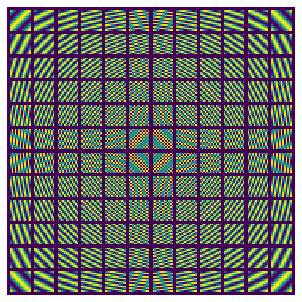

In [8]:
nrow = int(np.sqrt(winobj.nfilt))
leftover = winobj.nfilt % nrow
ncol = winobj.nfilt // nrow
if leftover:
    ncol += 1

img = np.zeros((2+(winobj.kernel_size[0]+2)*nrow, 2+((winobj.kernel_size[1]+2)*ncol)))
for col in range(ncol):
    for row in range(nrow):
        idx = col*nrow + row
        if idx < winobj.nfilt:
            filt_ = np.real(winobj.filters[:,:,idx])
            img[ (row*(winobj.kernel_size[0]+2)+2):((row+1)*(winobj.kernel_size[0]+2)), (col*(winobj.kernel_size[1]+2)+2):((col+1)*(winobj.kernel_size[1]+2)) ] = make_color(filt_)

fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img)